<a href="https://colab.research.google.com/github/Covenant23/BLACKJACK/blob/main/Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

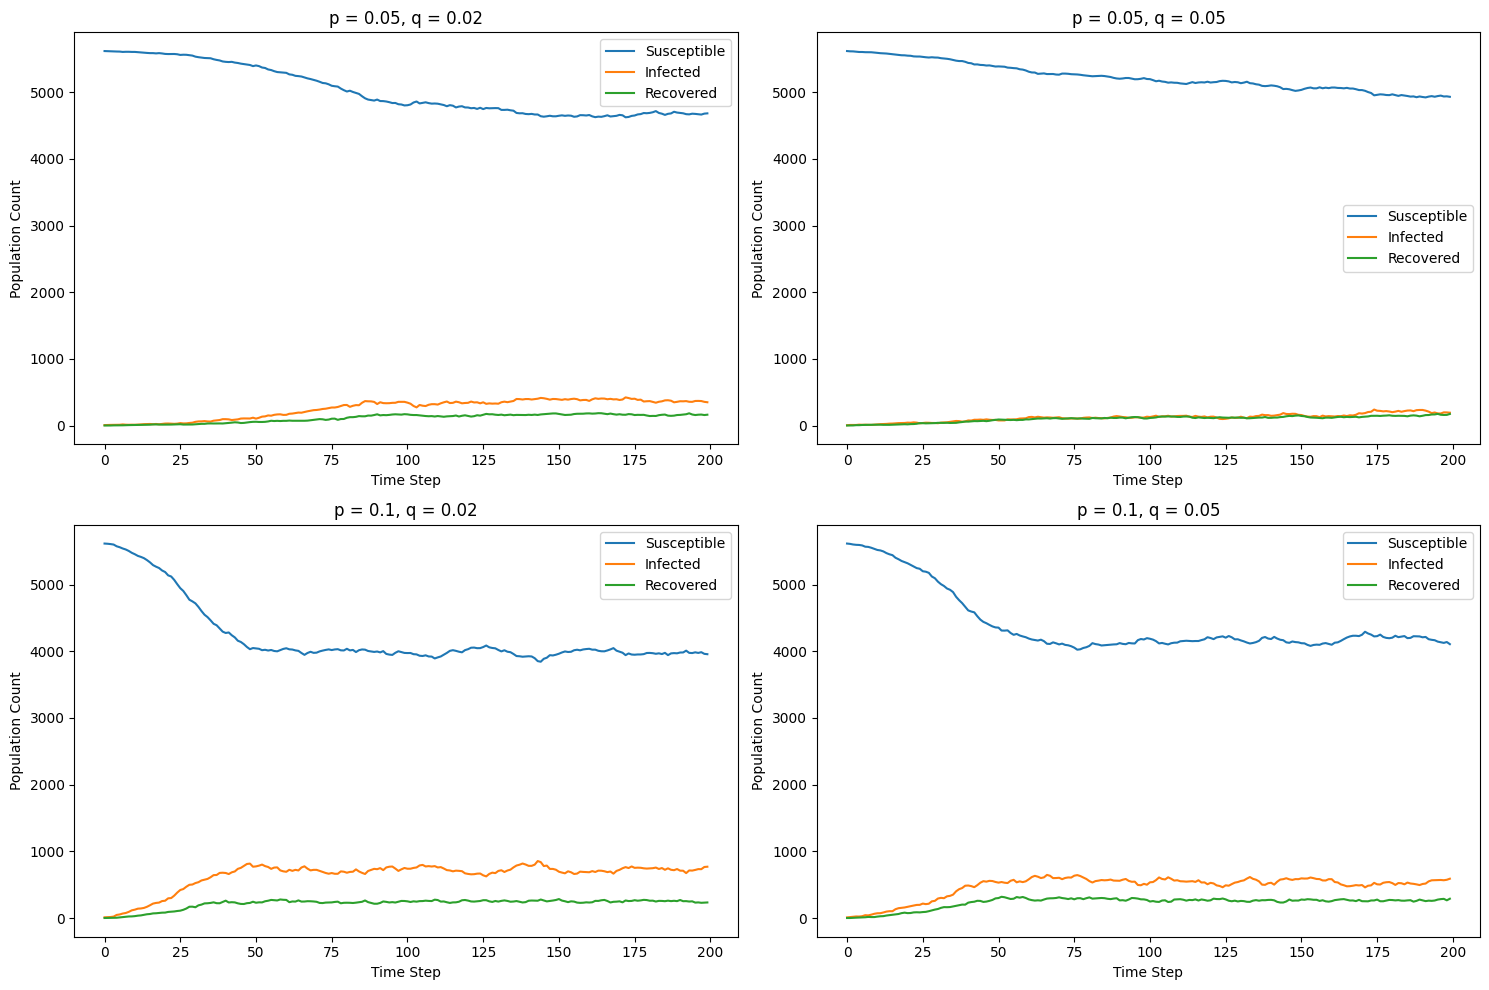

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
grid_size = 75
num_agents = 100
num_infected_initial = 5
num_steps = 200

p_values = [0.05, 0.1]  # Infection probabilities
q_values = [0.02, 0.05]  # Recovery probabilities

'''
A. Building the Base Model: Infection Dynamics in a Population
i. Define the Environment and Initial Conditions
'''
# Initialize grid and agents
def initialize_agents():
    agents = np.zeros((grid_size, grid_size), dtype=int)
    positions = np.random.choice(grid_size**2, num_agents, replace=False)
    x, y = np.unravel_index(positions, (grid_size, grid_size))

    # Set initial states
    agents[x[:num_infected_initial], y[:num_infected_initial]] = 1  # Infected (I)
    agents[x[num_infected_initial:], y[num_infected_initial:]] = 0  # Susceptible (S)
    return agents

'''
A. Building the Base Model: Infection Dynamics in a Population
ii. Define Agent Behaviors
'''
# Agent behaviors
def move_agents(agents):
    new_agents = np.zeros_like(agents)
    for i in range(grid_size):
        for j in range(grid_size):
            if agents[i, j] > 0:
                dx, dy = np.random.choice([-1, 0, 1], 2)
                new_i, new_j = (i + dx) % grid_size, (j + dy) % grid_size
                new_agents[new_i, new_j] += agents[i, j]
    return new_agents

def infect_susceptible(agents, p):
    new_agents = agents.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if agents[i, j] == 0 and 1 in agents[max(i-1,0):min(i+2,grid_size), max(j-1,0):min(j+2,grid_size)]:
                if np.random.rand() < p:
                    new_agents[i, j] = 1
    return new_agents

def recover_infected(agents, q):
    new_agents = agents.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if agents[i, j] == 1 and np.random.rand() < q:
                new_agents[i, j] = 2  # Recovered (R)
    return new_agents

'''
A. Building the Base Model: Infection Dynamics in a Population
iii. Run the Simulation
'''
# Simulation
def run_simulation(p, q):
    agents = initialize_agents()
    susceptible_counts, infected_counts, recovered_counts = [], [], []

    for step in range(num_steps):
        agents = move_agents(agents)
        agents = infect_susceptible(agents, p)
        agents = recover_infected(agents, q)

        # Count the agents in each state
        susceptible_counts.append(np.sum(agents == 0))
        infected_counts.append(np.sum(agents == 1))
        recovered_counts.append(np.sum(agents == 2))

    return susceptible_counts, infected_counts, recovered_counts

'''
A. Building the Base Model: Infection Dynamics in a Population
iv. Sensitivity Analysis
'''
# Run sensitivity analysis and plot
def sensitivity_analysis():
    fig, ax = plt.subplots(len(p_values), len(q_values), figsize=(15, 10))

    for i, p in enumerate(p_values):
        for j, q in enumerate(q_values):
            susceptible, infected, recovered = run_simulation(p, q)
            ax[i, j].plot(susceptible, label='Susceptible')
            ax[i, j].plot(infected, label='Infected')
            ax[i, j].plot(recovered, label='Recovered')
            ax[i, j].set_title(f'p = {p}, q = {q}')
            ax[i, j].legend()
            ax[i, j].set_xlabel('Time Step')
            ax[i, j].set_ylabel('Population Count')

    plt.tight_layout()
    plt.show()

sensitivity_analysis()


**A(iv): Analyze how changes in p and q impact infection peaks, time to infection peak, and overall population
recovery**

Higher Infection Probability (p): Leads to a faster and higher infection peak, with a rapid decline as most agents get infected sooner.

Higher Recovery Probability (q): Results in a shorter duration for peak infections and a quicker accumulation of recovered agents.

Lower Values of 𝑝 and 𝑞: Generally lead to a prolonged infection phase with a lower peak, as fewer infections occur per time step, allowing the susceptible pool to remain larger for longer.


****
**Over-rall Population Recovery:**
Gradual Recovery and Stabilization:

Following the peak, the number of recovered agents starts to rise as infected individuals transition to the recovered state. Eventually, the infection count decreases as more agents recover and immunity builds up within the population.
This decline in infection and increase in recovery typically stabilizes to a steady state, where few or no susceptible agents remain, and the population reaches immunity in the simulation.

**Average Trends Across Random Initial Conditions:**

Although individual runs with different initial distributions of infected agents show variations in the exact peak time and height, the general trends (bell curve for infections, decline in susceptibles, and increase in recoveries) remain consistent.

Part B:


*Extending the Model: Social Distancing and Intervention Strategies*

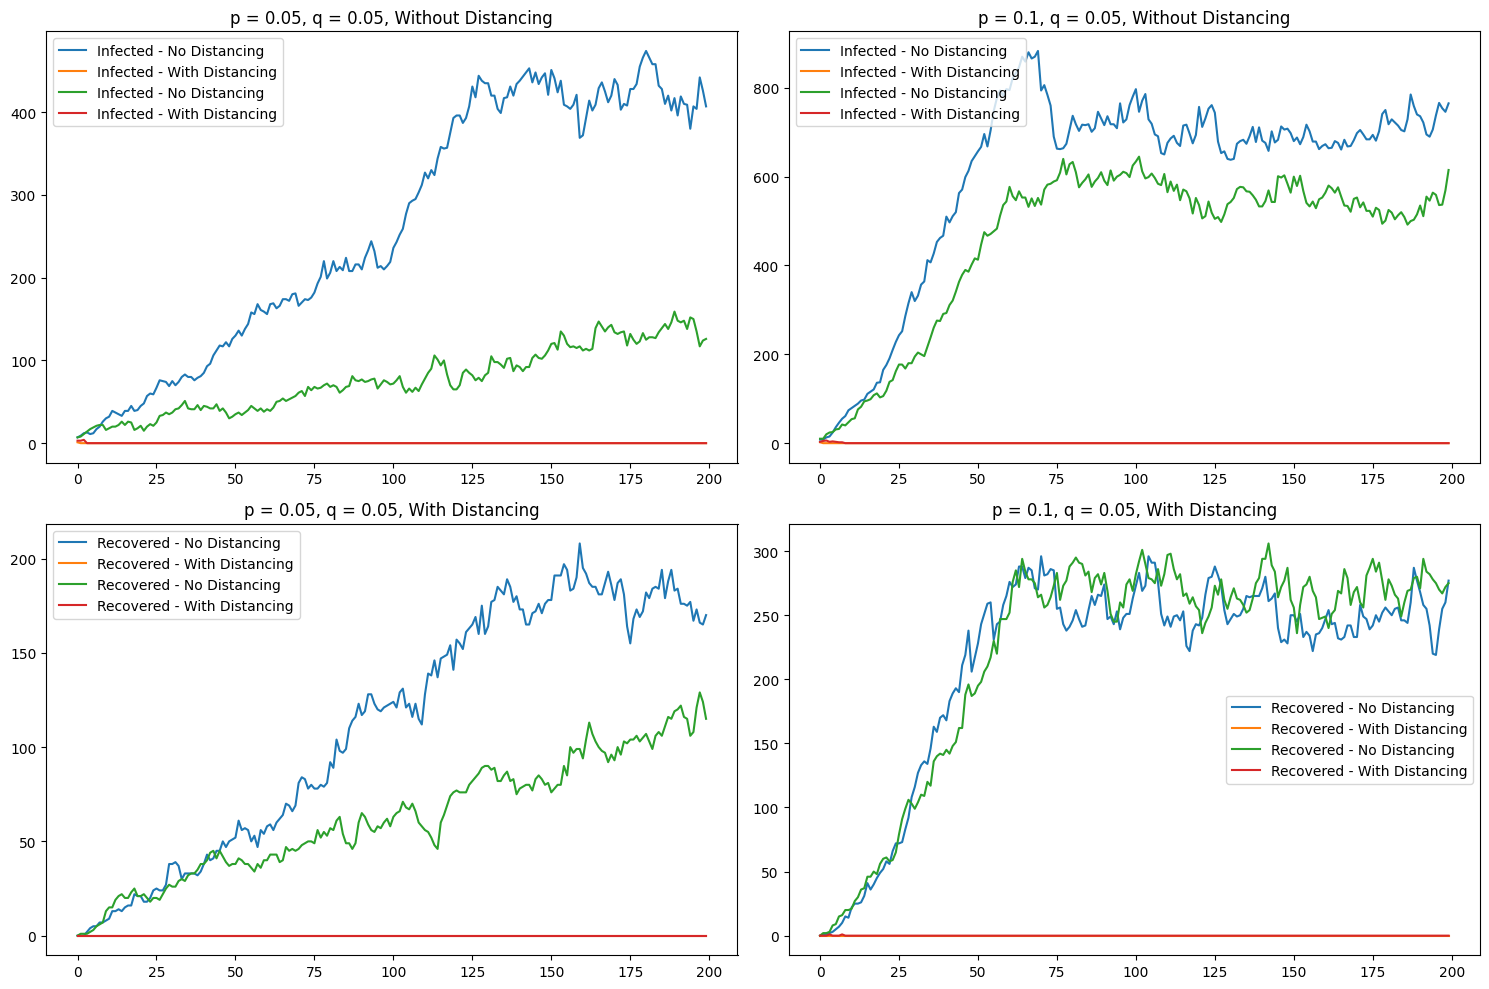

In [ ]:
'''
B) Extending the Model: Social Distancing and Intervention Strategies
i. Introduce Social Distancing Measures:
'''

import numpy as np
import matplotlib.pyplot as plt

# Parameters
grid_size = 75
num_agents = 100
num_infected_initial = 5
num_steps = 200
p_values = [0.05, 0.1]  # Infection probabilities
q_values = [0.02, 0.05]  # Recovery probabilities
m_values = [0.5, 0.8]  # Movement probability

# Define modified movement with social distancing
def move_agents_with_distancing(agents, movement_prob, distancing_aware=False):
    new_agents = np.zeros_like(agents)
    for i in range(grid_size):
        for j in range(grid_size):
            if agents[i, j] > 0:
                if np.random.rand() < movement_prob:  # Only move with probability m
                    dx, dy = np.random.choice([-1, 0, 1], 2)
                    new_i, new_j = (i + dx) % grid_size, (j + dy) % grid_size
                    if distancing_aware and agents[new_i, new_j] == 1:
                        # Avoid moving into a cell with an infected agent if possible
                        continue
                    new_agents[new_i, new_j] += agents[i, j]
    return new_agents

# Modify infect_susceptible function to consider social distancing
def infect_susceptible(agents, p):
    new_agents = agents.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if agents[i, j] == 0 and 1 in agents[max(i-1,0):min(i+2,grid_size), max(j-1,0):min(j+2,grid_size)]:
                if np.random.rand() < p:
                    new_agents[i, j] = 1
    return new_agents

# Run simulation with distancing
def run_simulation_with_distancing(p, q, m, distancing_aware):
    agents = initialize_agents()
    susceptible_counts, infected_counts, recovered_counts = [], [], []

    for step in range(num_steps):
        agents = move_agents_with_distancing(agents, m, distancing_aware)
        agents = infect_susceptible(agents, p)
        agents = recover_infected(agents, q)

        susceptible_counts.append(np.sum(agents == 0))
        infected_counts.append(np.sum(agents == 1))
        recovered_counts.append(np.sum(agents == 2))

    return susceptible_counts, infected_counts, recovered_counts

'''
ii. Analyze and Compare Results:
'''
# Compare simulations with and without distancing
def compare_distancing_effects():
    fig, ax = plt.subplots(2, len(p_values), figsize=(15, 10))

    for i, p in enumerate(p_values):
        for j, q in enumerate(q_values):
            no_distancing = run_simulation_with_distancing(p, q, m=1.0, distancing_aware=False)
            distancing = run_simulation_with_distancing(p, q, m=0.5, distancing_aware=True)

            ax[0, i].plot(no_distancing[1], label='Infected - No Distancing')
            ax[0, i].plot(distancing[1], label='Infected - With Distancing')
            ax[0, i].set_title(f'p = {p}, q = {q}, Without Distancing')
            ax[0, i].legend()

            ax[1, i].plot(no_distancing[2], label='Recovered - No Distancing')
            ax[1, i].plot(distancing[2], label='Recovered - With Distancing')
            ax[1, i].set_title(f'p = {p}, q = {q}, With Distancing')
            ax[1, i].legend()

    plt.tight_layout()
    plt.show()

compare_distancing_effects()


**Analysis and Comparison of Results**

**Peak Number of Infected Individuals:**

With social distancing, the peak number of infected individuals is expected to lower compared to the scenario without distancing. This reduced peak suggests that fewer people are infected at any given time.

**Time to Infection Peak and Stable Recovered State:**

Social distancing typically delays the infection peak because it slows down transmission.

**Impact on Infection Rates and Timing of Infection Peaks:**

Social distancing significantly flattens the curve by reducing the infection rates and spreading cases over a longer period. This "flattening" effect prevents healthcare systems from being overwhelmed and illustrates the public health benefits of distancing in managing outbreaks effectively.

**Implications for Real-World Public Health Interventions**
In real-world scenarios, the findings imply that social distancing can be effective in controlling pandemic spread by lowering peak infection rates, delaying peaks, and distributing cases over time. This model supports public health strategies that aim to prevent healthcare system overload by implementing distancing, even though such measures may extend the overall duration of the pandemic.

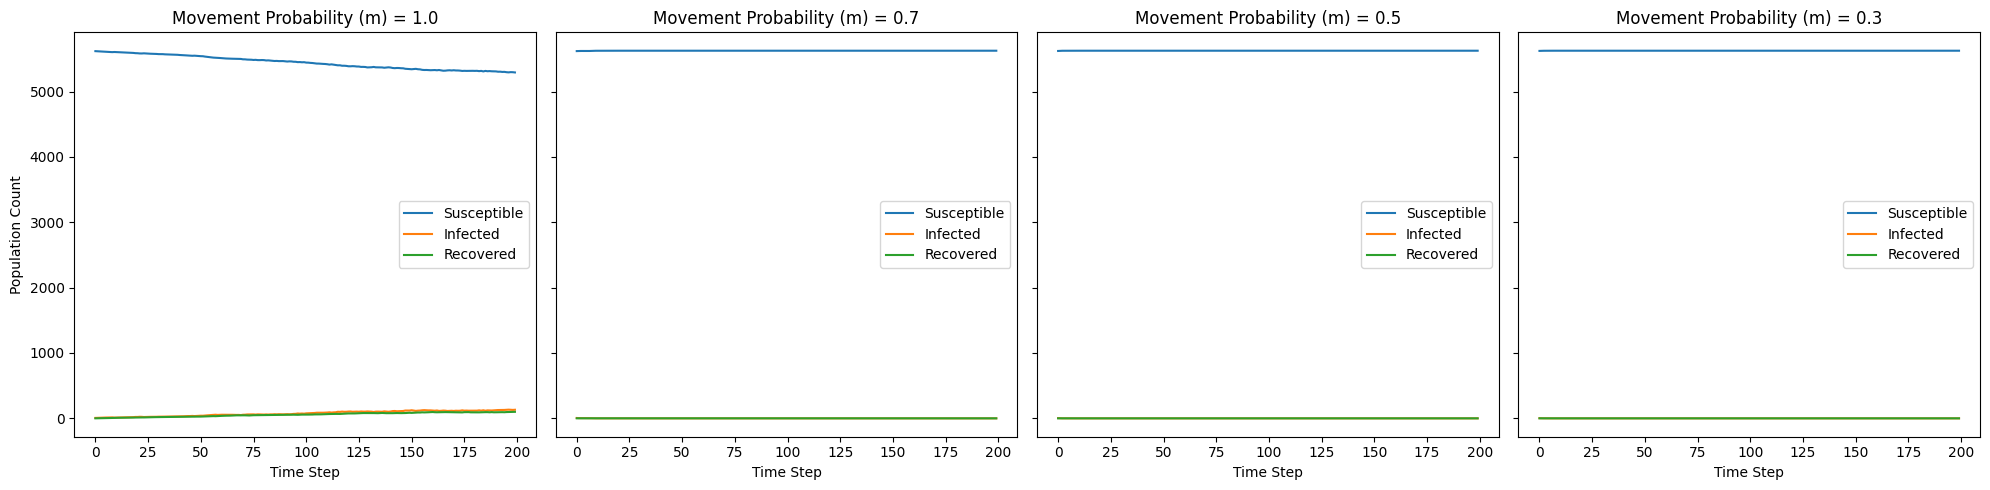

In [ ]:
'''
ii. Additional Sensitivity Analysis
• Test varying strengths of social distancing (e.g., different probabilities of movement) to explore how
stricter or more relaxed distancing affects infection dynamics.
• Record and discuss changes in infection patterns and recovery rates with each level of intervention
'''

import numpy as np
import matplotlib.pyplot as plt

# Parameters
grid_size = 75
num_agents = 100
num_infected_initial = 5
num_steps = 200
p = 0.1  # Fixed infection probability
q = 0.05  # Fixed recovery probability
movement_probabilities = [1.0, 0.7, 0.5, 0.3]  # Varying social distancing levels

# Run simulation with varying distancing strengths
def run_sensitivity_analysis_on_distancing():
    results = {}

    for m in movement_probabilities:
        susceptible_avgs, infected_avgs, recovered_avgs = [], [], []

        # Run multiple simulations to get an average trend
        for _ in range(10):  # Averaging over 10 runs
            agents = initialize_agents()
            susceptible_counts, infected_counts, recovered_counts = [], [], []

            for step in range(num_steps):
                agents = move_agents_with_distancing(agents, m, distancing_aware=True)
                agents = infect_susceptible(agents, p)
                agents = recover_infected(agents, q)

                susceptible_counts.append(np.sum(agents == 0))
                infected_counts.append(np.sum(agents == 1))
                recovered_counts.append(np.sum(agents == 2))

            # Collect results for this run
            susceptible_avgs.append(susceptible_counts)
            infected_avgs.append(infected_counts)
            recovered_avgs.append(recovered_counts)

        # Average across multiple runs
        results[m] = {
            "susceptible": np.mean(susceptible_avgs, axis=0),
            "infected": np.mean(infected_avgs, axis=0),
            "recovered": np.mean(recovered_avgs, axis=0),
        }

    # Plot results
    fig, ax = plt.subplots(1, len(movement_probabilities), figsize=(20, 5), sharey=True)
    for i, m in enumerate(movement_probabilities):
        ax[i].plot(results[m]["susceptible"], label="Susceptible")
        ax[i].plot(results[m]["infected"], label="Infected")
        ax[i].plot(results[m]["recovered"], label="Recovered")
        ax[i].set_title(f"Movement Probability (m) = {m}")
        ax[i].legend()
        ax[i].set_xlabel("Time Step")
        if i == 0:
            ax[i].set_ylabel("Population Count")

    plt.tight_layout()
    plt.show()

run_sensitivity_analysis_on_distancing()


Analysis and Discussion of Results**

**Peak Number of Infected Individuals:**

With higher movement probabilities, the peak number of infected agents tends to be higher. This is because agents have more interactions, increasing the chance of infections.
With stricter distancing, the peak infection count is lower.

**Timing of Infection Peaks:**
With relaxed distancing (higher
𝑚), infection peaks occur earlier because the virus spreads more rapidly.
Stricter distancing (lower
𝑚) delays the infection peak as fewer interactions slow down the spread, potentially reducing peak severity.

**Recovery Rates and Duration of the Infection Spread:**
Stricter distancing measures tend to lengthen the overall duration of the infection spread since infections occur more gradually. This slower spread means that more individuals remain susceptible for longer, causing a prolonged pandemic duration but with a lower daily case load. Relaxed distancing results in a faster rise and fall of infection and recovery counts, meaning a shorter but more intense pandemic wave.